In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_excel('panel_temperature_and_light_raw_dataset_MK_2025_december_3.xlsx')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Dataset shape: (252153, 20)
Columns: ['datetime', 'date', 'time', 'year', 'month', 'day', 'hour', 'minute', 'second', 'area', 'eu', 'sensor_id', 'lower_temp_C', 'lower_humidity', 'upper_temp_C', 'upper_humidity', 'lower_irradiance(μW/cm²)', 'lower_lux', 'upper_irradiance(μW/cm²)', 'upper_lux']


In [36]:
def plot_temperature_for_eu(df, eu_num, time_col='datetime'):
    df_eu = df[df['eu'] == eu_num].copy()
    if len(df_eu) == 0:
        print(f"No data for EU_{eu_num}")
        return None
    
    df_eu = df_eu.sort_values(by=time_col)
    time_data = pd.to_datetime(df_eu[time_col])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(time_data, df_eu['lower_temp_C'], label=f'Lower (EU_{eu_num})', linewidth=1.2, color='blue')
    ax.plot(time_data, df_eu['upper_temp_C'], label=f'Upper (EU_{eu_num})', linewidth=1.2, color='red')
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature (°C)')
    ax.set_title(f'Temperature - EU_{eu_num}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return fig


def plot_humidity_for_eu(df, eu_num, time_col='datetime'):
    df_eu = df[df['eu'] == eu_num].copy()
    if len(df_eu) == 0:
        print(f"No data for EU_{eu_num}")
        return None
    
    df_eu = df_eu.sort_values(by=time_col)
    time_data = pd.to_datetime(df_eu[time_col])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(time_data, df_eu['lower_humidity'], label=f'Lower (EU_{eu_num})', linewidth=1.2, color='green')
    ax.plot(time_data, df_eu['upper_humidity'], label=f'Upper (EU_{eu_num})', linewidth=1.2, color='orange')
    ax.set_xlabel('Time')
    ax.set_ylabel('Humidity (%)')
    ax.set_title(f'Humidity - EU_{eu_num}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return fig


def plot_irradiance_for_eu(df, eu_num, time_col='datetime'):
    df_eu = df[df['eu'] == eu_num].copy()
    if len(df_eu) == 0:
        print(f"No data for EU_{eu_num}")
        return None
    
    lower_col = 'lower_irradiance(μW/cm²)'
    upper_col = 'upper_irradiance(μW/cm²)'
    
    df_eu = df_eu.sort_values(by=time_col)
    time_data = pd.to_datetime(df_eu[time_col])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(time_data, df_eu[lower_col], label=f'Lower (EU_{eu_num})', linewidth=1.2, color='cyan')
    ax.plot(time_data, df_eu[upper_col], label=f'Upper (EU_{eu_num})', linewidth=1.2, color='magenta')
    ax.set_xlabel('Time')
    ax.set_ylabel('Irradiance (μW/cm²)')
    ax.set_title(f'Irradiance - EU_{eu_num}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return fig


In [37]:
def plot_temperature_for_day(df, target_date, eu_num=1, time_col='datetime'):
    target_date = pd.to_datetime(target_date).date()
    df_copy = df.copy()
    df_copy['date_only'] = pd.to_datetime(df_copy[time_col]).dt.date
    df_day = df_copy[(df_copy['date_only'] == target_date) & (df_copy['eu'] == eu_num)].copy()
    
    if len(df_day) == 0:
        print(f"No data for EU_{eu_num} on {target_date}")
        return None
    
    df_day = df_day.sort_values(by=time_col)
    time_data = pd.to_datetime(df_day[time_col])
    
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(time_data, df_day['lower_temp_C'], label=f'Lower (EU_{eu_num})', linewidth=1.5, color='blue', marker='o', markersize=3)
    ax.plot(time_data, df_day['upper_temp_C'], label=f'Upper (EU_{eu_num})', linewidth=1.5, color='red', marker='s', markersize=3)
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature (°C)')
    ax.set_title(f'Temperature - EU_{eu_num} on {target_date}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return fig


In [38]:
def plot_temperature_together(df, eu1_num, eu2_num, time_col='datetime', start_date=None, end_date=None, show_upper_only=False):
    df_filtered = df.copy()
    if start_date:
        df_filtered = df_filtered[pd.to_datetime(df_filtered[time_col]) >= pd.to_datetime(start_date)]
    if end_date:
        df_filtered = df_filtered[pd.to_datetime(df_filtered[time_col]) <= pd.to_datetime(end_date)]
    
    df_eu1 = df_filtered[df_filtered['eu'] == eu1_num].sort_values(by=time_col)
    df_eu2 = df_filtered[df_filtered['eu'] == eu2_num].sort_values(by=time_col)
    
    if len(df_eu1) == 0 or len(df_eu2) == 0:
        print(f"No data for EU_{eu1_num} or EU_{eu2_num}")
        return None
    
    time1 = pd.to_datetime(df_eu1[time_col])
    time2 = pd.to_datetime(df_eu2[time_col])
    
    fig, ax = plt.subplots(figsize=(14, 7))
    
    if not show_upper_only:
        ax.plot(time1, df_eu1['lower_temp_C'], label=f'Lower (EU_{eu1_num})', linewidth=1.5, color='blue', linestyle='-')
        ax.plot(time2, df_eu2['lower_temp_C'], label=f'Lower (EU_{eu2_num})', linewidth=1.5, color='cyan', linestyle='--')
    ax.plot(time1, df_eu1['upper_temp_C'], label=f'Upper (EU_{eu1_num})', linewidth=1.5, color='red', linestyle='-')
    ax.plot(time2, df_eu2['upper_temp_C'], label=f'Upper (EU_{eu2_num})', linewidth=1.5, color='orange', linestyle='--')
    
    title = f"{'Upper ' if show_upper_only else ''}Temperature: EU_{eu1_num} vs EU_{eu2_num}"
    if start_date or end_date:
        title += f" ({start_date or 'start'} to {end_date or 'end'})"
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature (°C)')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return fig


In [39]:
def plot_irradiance_together(df, eu1_num, eu2_num, time_col='datetime', start_date=None, end_date=None, show_upper_only=False):
    lower_col = 'lower_irradiance(μW/cm²)'
    upper_col = 'upper_irradiance(μW/cm²)'
    
    df_filtered = df.copy()
    if start_date:
        df_filtered = df_filtered[pd.to_datetime(df_filtered[time_col]) >= pd.to_datetime(start_date)]
    if end_date:
        df_filtered = df_filtered[pd.to_datetime(df_filtered[time_col]) <= pd.to_datetime(end_date)]
    
    df_eu1 = df_filtered[df_filtered['eu'] == eu1_num].sort_values(by=time_col)
    df_eu2 = df_filtered[df_filtered['eu'] == eu2_num].sort_values(by=time_col)
    
    if len(df_eu1) == 0 or len(df_eu2) == 0:
        print(f"No data for EU_{eu1_num} or EU_{eu2_num}")
        return None
    
    time1 = pd.to_datetime(df_eu1[time_col])
    time2 = pd.to_datetime(df_eu2[time_col])
    
    fig, ax = plt.subplots(figsize=(14, 7))
    
    if not show_upper_only:
        ax.plot(time1, df_eu1[lower_col], label=f'Lower (EU_{eu1_num})', linewidth=1.5, color='cyan', linestyle='-')
        ax.plot(time2, df_eu2[lower_col], label=f'Lower (EU_{eu2_num})', linewidth=1.5, color='blue', linestyle='--')
    ax.plot(time1, df_eu1[upper_col], label=f'Upper (EU_{eu1_num})', linewidth=1.5, color='magenta', linestyle='-')
    ax.plot(time2, df_eu2[upper_col], label=f'Upper (EU_{eu2_num})', linewidth=1.5, color='red', linestyle='--')
    
    title = f"{'Upper ' if show_upper_only else ''}Irradiance: EU_{eu1_num} vs EU_{eu2_num}"
    if start_date or end_date:
        title += f" ({start_date or 'start'} to {end_date or 'end'})"
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Irradiance (μW/cm²)')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return fig


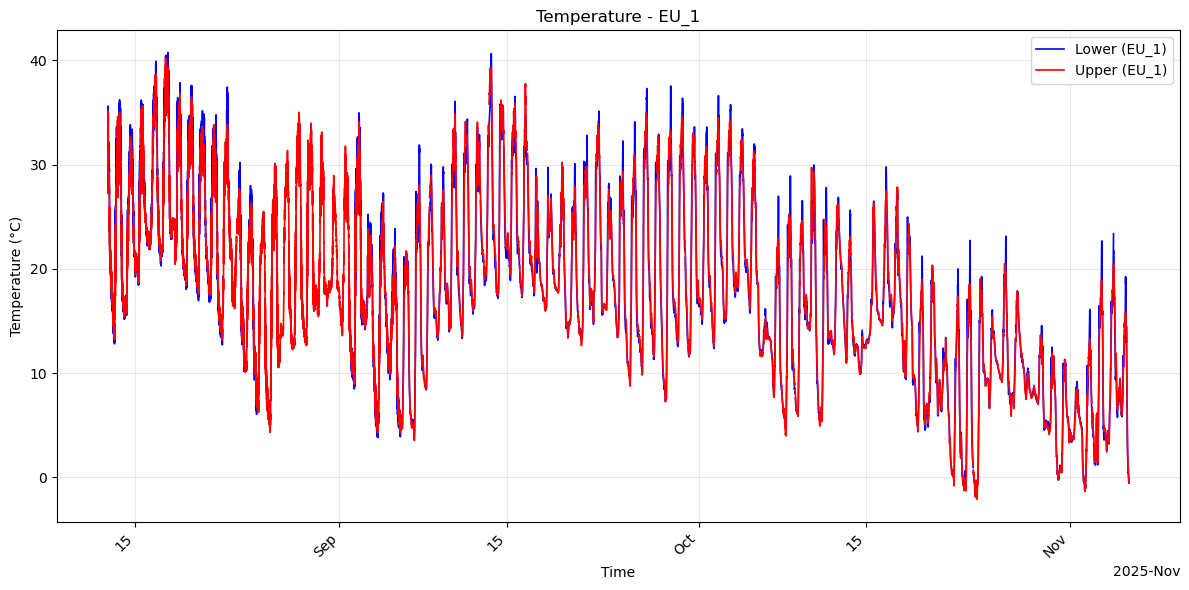

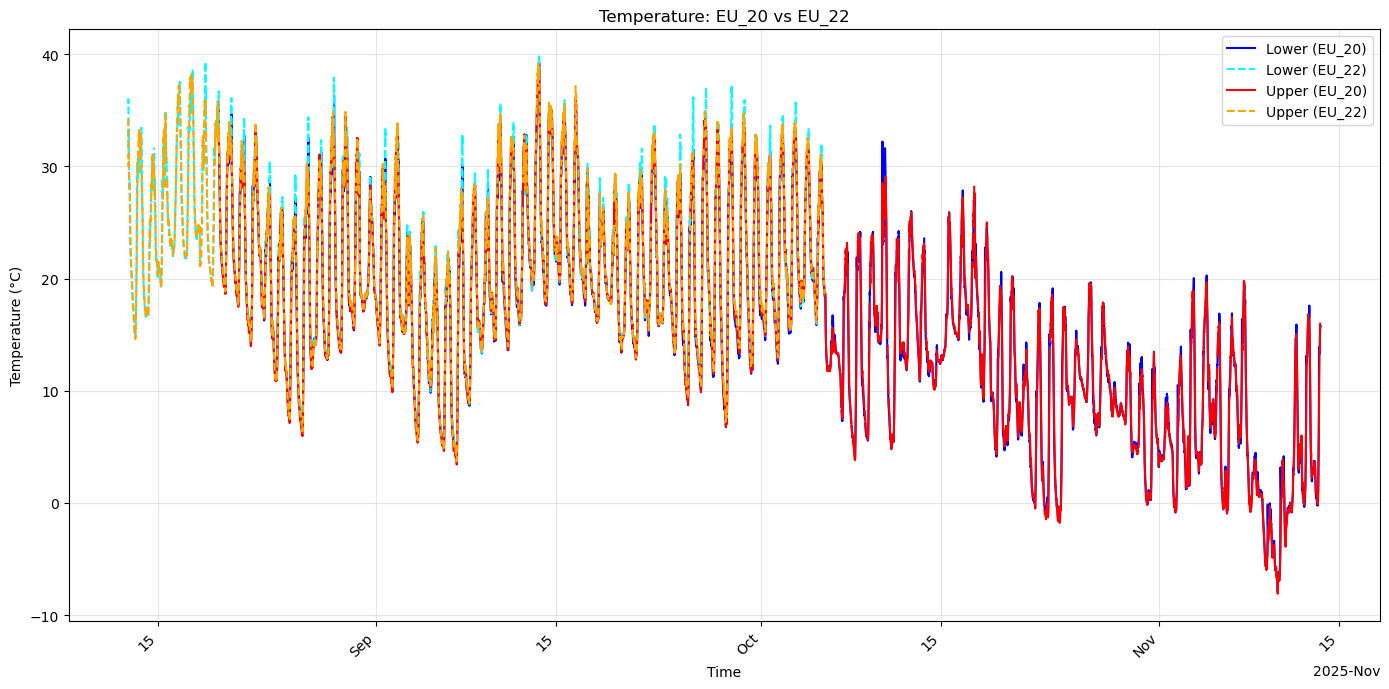

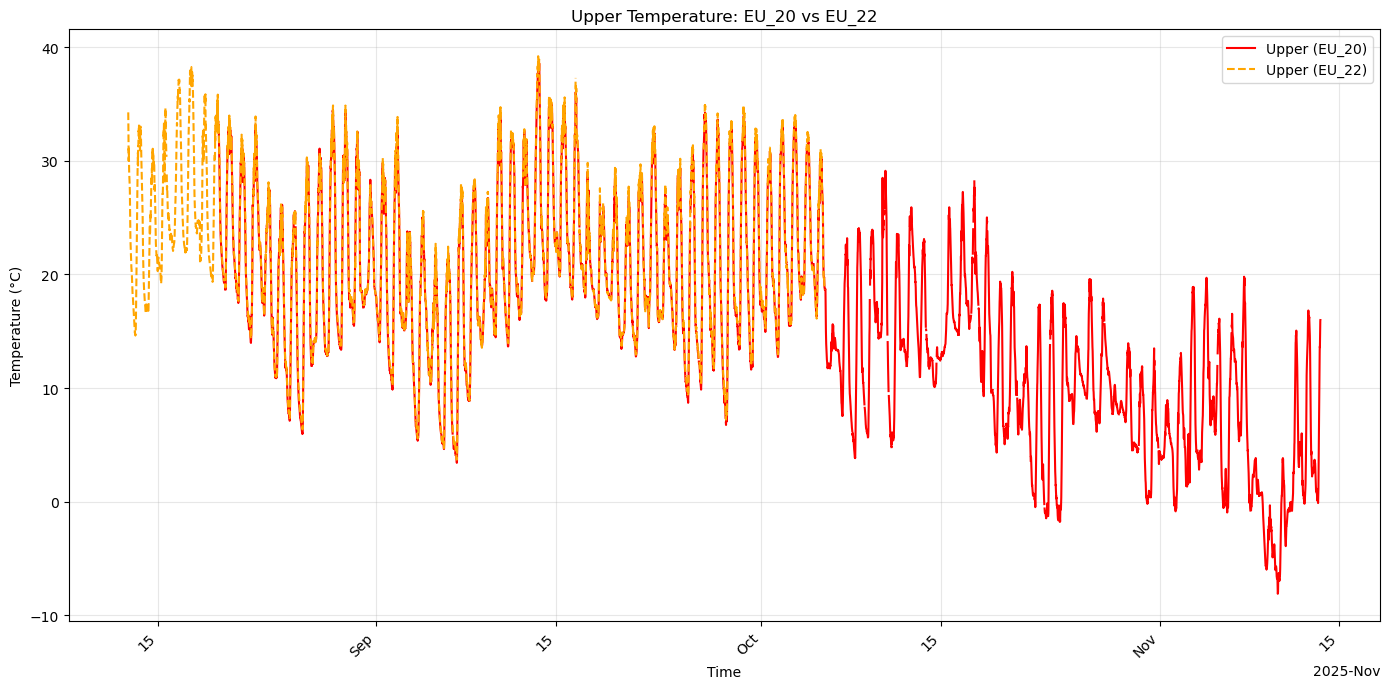

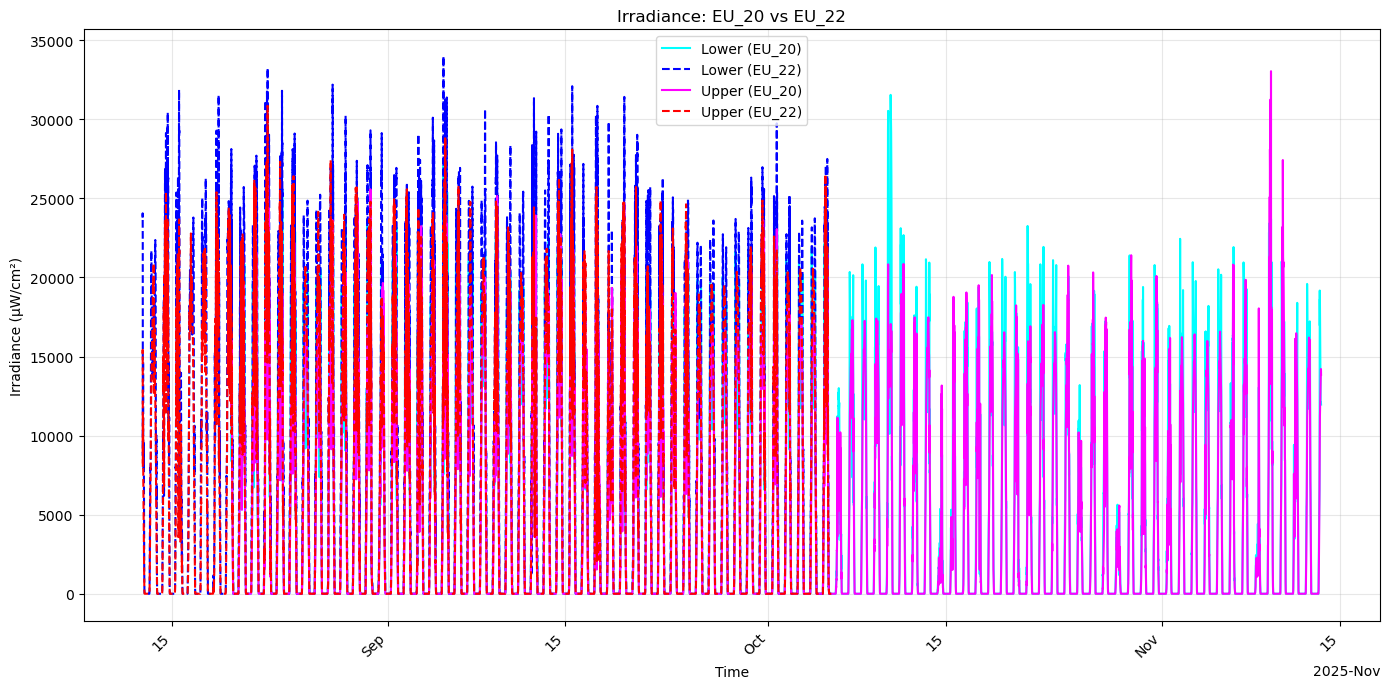

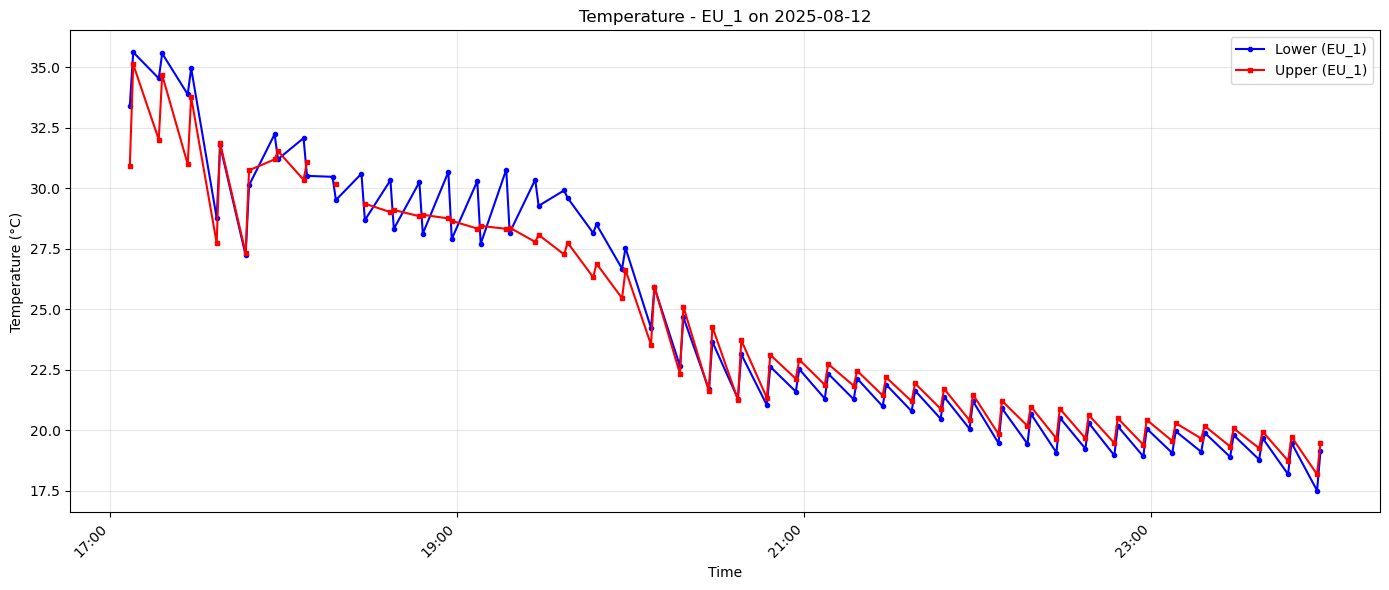

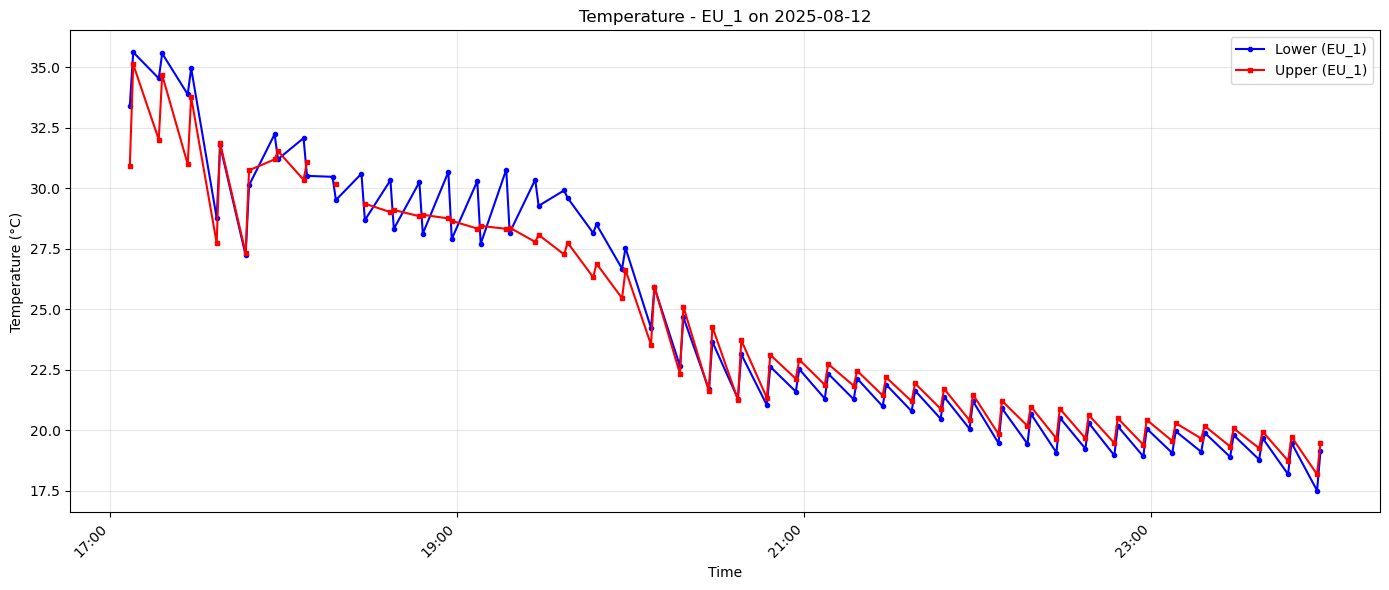

In [40]:
# Examples
plot_temperature_for_eu(df, eu_num=1)
plot_temperature_together(df, eu1_num=20, eu2_num=22)
plot_temperature_together(df, eu1_num=20, eu2_num=22, show_upper_only=True)
plot_irradiance_together(df, eu1_num=20, eu2_num=22)
plot_temperature_for_day(df, target_date='2025-08-12', eu_num=1)
